In [79]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import fftpack
import processing_signals as ps
import padasip as pa

# plt.figure(figsize=(10, 7))

In [80]:
model = np.load("MODEL.NPY")
model_agc = np.load("MODEL_AGC.NPY")
gather = np.load("GATHER.NPY")

print(model.shape, model_agc.shape, gather.shape)

(96, 2001) (96, 2001) (96, 2001)


In [81]:
x_max_gather = np.abs(gather).max(axis=1)
print(x_max_gather, x_max_gather.shape)

[6.5213153e+09 5.9616707e+09 7.2753603e+09 6.5156301e+09 5.8333880e+09
 5.5208960e+09 5.7095578e+09 5.3760287e+09 5.3079368e+09 5.2218716e+09
 4.9952973e+09 4.7622676e+09 4.9082655e+09 4.8281518e+09 4.8843203e+09
 4.6632837e+09 4.4564275e+09 4.6783406e+09 4.5550223e+09 4.4115968e+09
 4.2425137e+09 4.4156396e+09 4.4731023e+09 4.5309420e+09 4.9576919e+09
 4.6675395e+09 4.6257930e+09 4.1617047e+09 4.1137044e+09 4.3991572e+09
 4.0202734e+09 3.8686257e+09 3.8613612e+09 3.7426916e+09 3.9301545e+09
 3.9999565e+09 3.8421696e+09 3.6019351e+09 3.6726884e+09 3.3510659e+09
 3.3262469e+09 3.6095286e+09 3.6468739e+09 3.7225979e+09 3.0026496e+09
 3.2658232e+09 3.3208975e+09 3.2120049e+09 3.2393853e+09 3.1203694e+09
 2.9836244e+09 3.0149819e+09 3.1782413e+09 2.9407736e+09 2.9844093e+09
 3.1674836e+09 3.1018196e+09 2.8390579e+09 2.9930903e+09 2.8759521e+09
 2.7876306e+09 3.3156593e+09 2.9860301e+09 3.1775644e+09 2.9430932e+09
 2.8826307e+09 3.2273372e+09 3.2856947e+09 3.4681249e+09 3.4353690e+09
 3.044

In [82]:
def normalize_noise(x, gather):
    # print(x.max(axis=1))
    x_mean = x.mean(axis=1)
    x_max_gather = np.abs(gather).max(axis=1)
    for i in range(x.shape[0]):
        x[i] -= x_mean[i]
        x[i] /= x_max_gather[i]
    return x

def normalize(x):
    # print(x.max(axis=1))
    x_mean = x.mean(axis=1)
    x_max = np.abs(x).max(axis=1)
    for i in range(x.shape[0]):
        x[i] -= x_mean[i]
        x[i] /= x_max[i]
    return x

In [83]:
model = normalize_noise(model, gather)
# model = normalize(model)
model_agc = normalize(model_agc)
gather = normalize(gather)

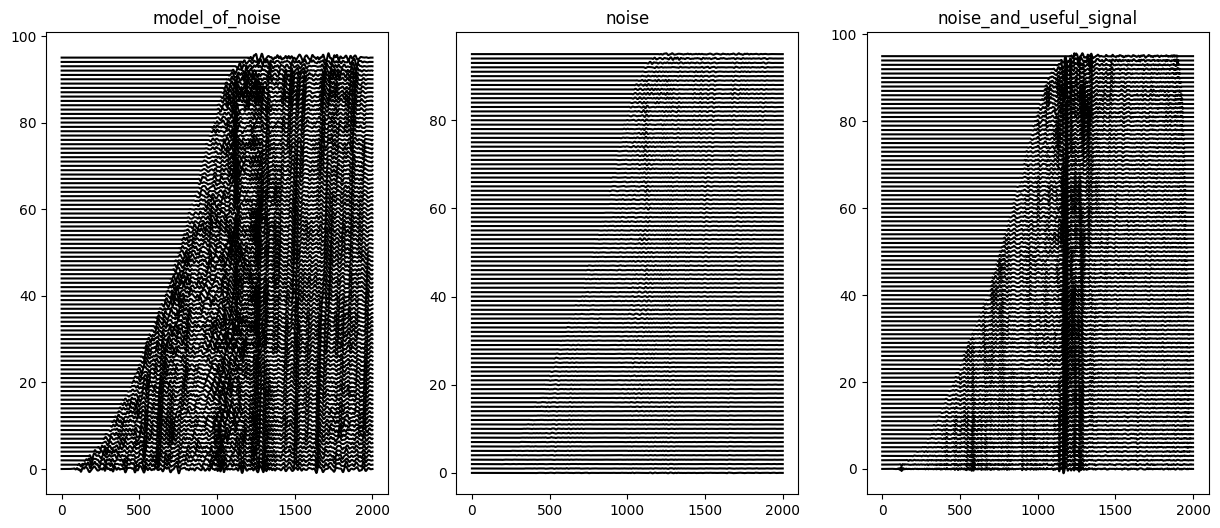

In [84]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
plt.title("model_of_noise")
for i in range(96):
    # max_value = np.abs(model_agc[i]).max()
    plt.plot(i + model_agc[i], color='black')

plt.subplot(1, 3, 2)
plt.title("noise")
for i in range(96):
    # max_value = np.abs(model[i]).max()
    plt.plot(i + model[i], color='black')

plt.subplot(1, 3, 3)
plt.title("noise_and_useful_signal")
for i in range(96):
    # max_value = np.abs(gather[i]).max()
    plt.plot(i + gather[i], color='black')

plt.show()

In [85]:
xgrid, tgrid = np.meshgrid(np.arange(2001), np.arange(96))

In [86]:
# ax = plt.axes(projection='3d')
# ax.plot_wireframe(xgrid, tgrid, model)
# # ax.plot(tgrid, xgrid, tempU.reshape((len(np.unique(tempT)), len(np.unique(tempX)))))
# plt.xlabel("ось X")
# plt.ylabel("ось T")
# plt.title("model")
# plt.show()

# Просто вывод ошибки между моделью шума и реальным шумом

In [87]:
# print(f"NMSE = {ps.NMSE(approx_real_signal_1d_lms, model[number_trace]):.1e}")
print(f"MSE = {ps.MSE(model_agc, model):.10e}")
print(f"MSE zer = {ps.MSE(np.zeros_like(model), model):.10e}")
# print(f"NME = {ps.NME(approx_real_signal_1d_lms, model[number_trace]):.1e}")
print(f"MAE = {ps.ME(model_agc, model):.10e}")
print(f"MAE zer = {ps.ME(np.zeros_like(model), model):.10e}")

MSE = 5.2222125232e-02
MSE zer = 9.2869543005e-04
MAE = 1.4513115585e-01
MAE zer = 1.6986917704e-02


# Мой LMS метод:

In [88]:
approx_real_weights_1d_lms = ps.fitting_of_LMS(model_agc, gather, 3, 0.00023, 1) #LMS
# print(approx_real_weights_1d_nlms, approx_real_weights_1d_nlms.shape)

In [89]:
approx_real_signal_1d_lms = ps.processing_of_signal(model_agc, approx_real_weights_1d_lms)

# print(f"NMSE = {ps.NMSE(approx_real_signal_1d_lms, model[number_trace]):.1e}")
print(f"MSE = {ps.MSE(approx_real_signal_1d_lms, model):.10e}")
# print(f"NME = {ps.NME(approx_real_signal_1d_lms, model[number_trace]):.1e}")
print(f"MAE = {ps.ME(approx_real_signal_1d_lms, model):.10e}")

(96, 2001) (3, 96)
MSE = 7.0141174365e-04
MAE = 1.4137313701e-02
(96, 2001) (3, 96)
MSE = 7.0141174365e-04
MAE = 1.4137313701e-02


In [90]:
number_trace = 50

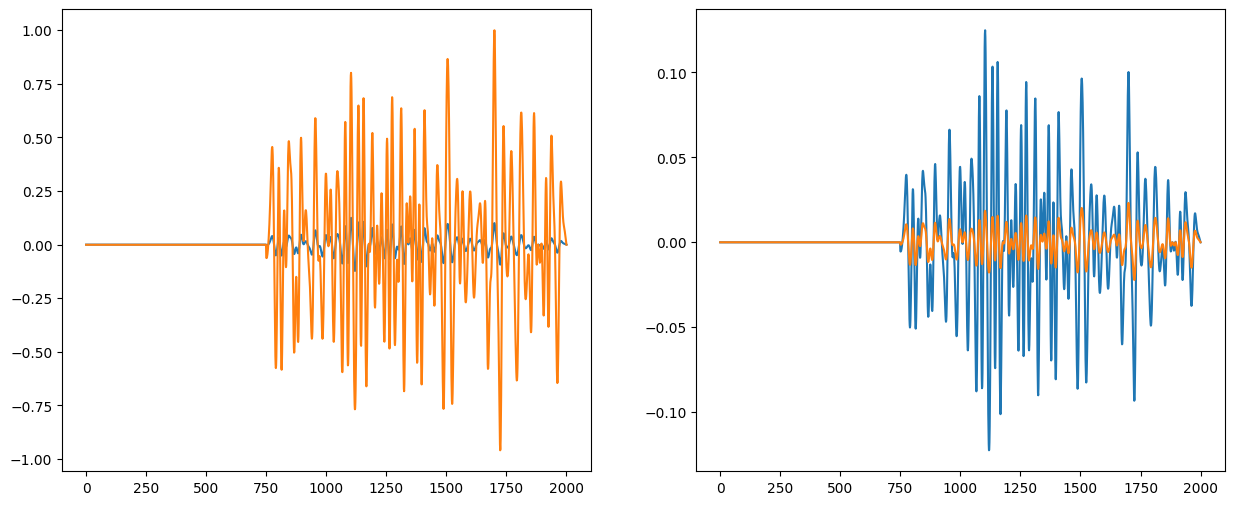

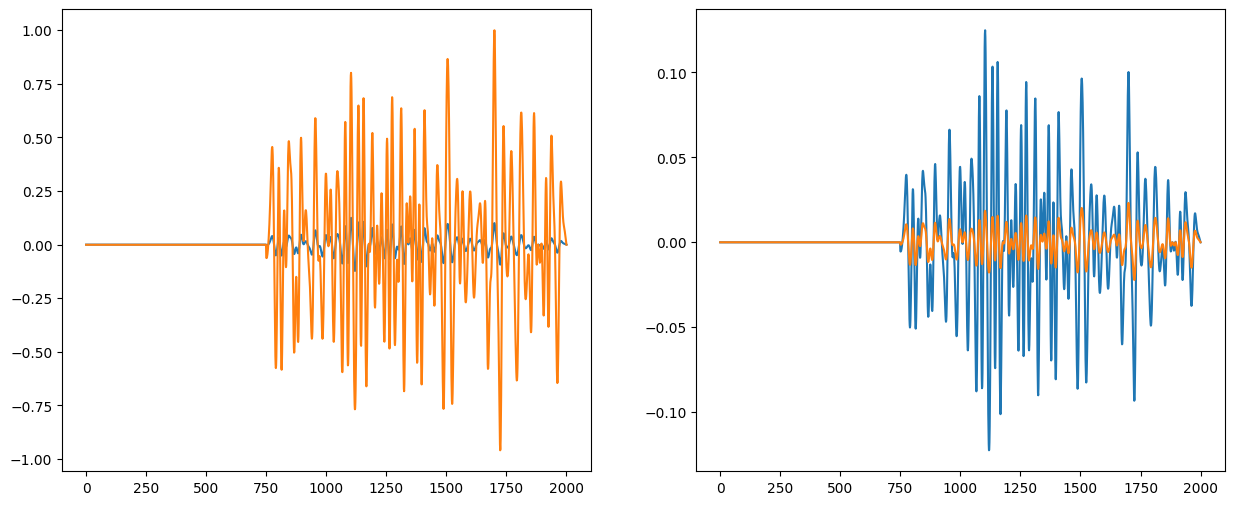

In [91]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(model[number_trace])
plt.plot(model_agc[number_trace])

plt.subplot(1, 2, 2)
plt.plot(model[number_trace])
plt.plot(approx_real_signal_1d_lms[number_trace])


plt.show()

# Мой NLMS метод:

In [92]:
approx_real_weights_1d_nlms = ps.fitting_of_NLMS(model_agc, gather, 3, 0.00025, 1) #NLMS
# print(approx_real_weights_1d_nlms, approx_real_weights_1d_nlms.shape)

In [93]:
approx_real_signal_1d_nlms = ps.processing_of_signal(model_agc, approx_real_weights_1d_nlms)

# print(f"NMSE = {ps.NMSE(approx_real_signal_1d_nlms, model[number_trace]):.1e}") 
print(f"MSE = {ps.MSE(approx_real_signal_1d_nlms, model):.10e}")
# print(f"NME = {ps.NME(approx_real_signal_1d_nlms, model[number_trace]):.1e}") 
print(f"MAE = {ps.ME(approx_real_signal_1d_nlms, model):.10e}")

(96, 2001) (3, 96)
MSE = 6.8466976518e-04
MAE = 1.3905685395e-02
(96, 2001) (3, 96)
MSE = 6.8466976518e-04
MAE = 1.3905685395e-02


In [94]:
number_trace = 50

In [95]:
# print(f"MSE = {ps.MSE(approx_real_signal_1d_nlms[number_trace], model[number_trace]):.3e}")
print(f"MAE = {ps.ME(approx_real_signal_1d_nlms[number_trace], model[number_trace]):.3e}")

MAE = 1.456e-02
MAE = 1.456e-02


In [96]:
# print(f"MSE = {ps.MSE(model_agc[number_trace], model[number_trace]):.3e}")
print(f"MAE = {ps.ME(model_agc[number_trace], model[number_trace]):.3e}")

MAE = 1.505e-01
MAE = 1.505e-01


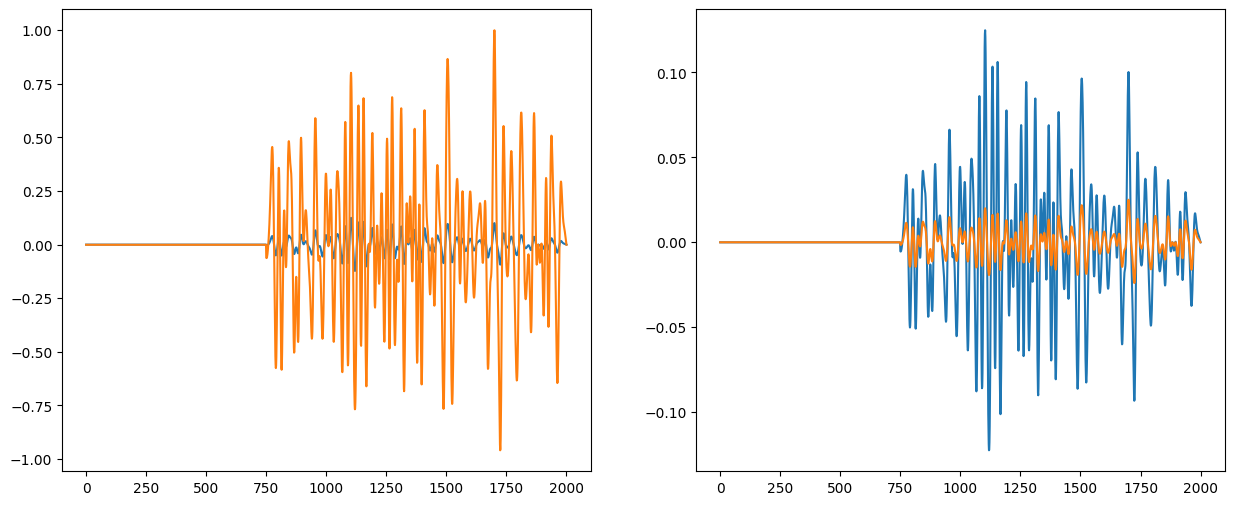

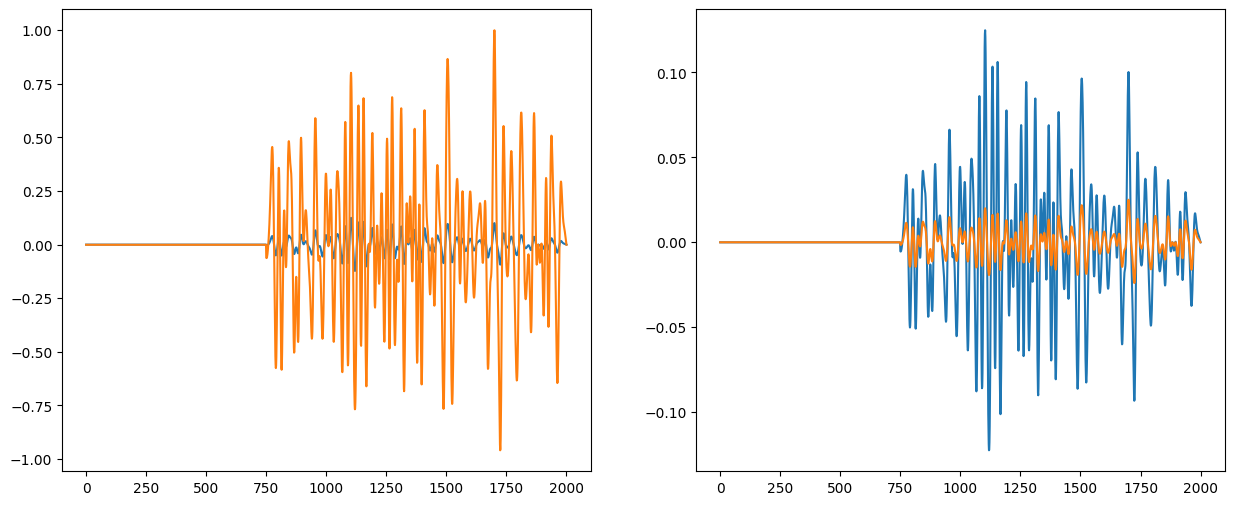

In [97]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(model[number_trace])
plt.plot(model_agc[number_trace])

plt.subplot(1, 2, 2)
plt.plot(model[number_trace])
plt.plot(approx_real_signal_1d_nlms[number_trace])


plt.show()

# Мой RLS метод:

In [98]:
approx_real_weights_1d_rls = ps.fitting_of_RLS(model_agc, gather, 3, 0.9908)
# print(approx_real_weights_1d_rls, approx_real_weights_1d_rls.shape)

In [99]:
approx_real_signal_1d_rls = ps.processing_of_signal(model_agc, approx_real_weights_1d_rls)

# print(f"NMSE = {ps.NMSE(approx_real_signal_1d_rls, model[number_trace]):.1e}") 
print(f"MSE = {ps.MSE(approx_real_signal_1d_rls, model):.10e}")
# print(f"NME = {ps.NME(approx_real_signal_1d_rls, model[number_trace]):.1e}") 
print(f"MAE = {ps.ME(approx_real_signal_1d_rls, model):.10e}")

(96, 2001) (3, 96)
MSE = 2.3877529020e-04
MAE = 8.7749632075e-03
(96, 2001) (3, 96)
MSE = 2.3877529020e-04
MAE = 8.7749632075e-03


In [100]:
number_trace = 50

In [101]:
print(f"MSE = {ps.MSE(approx_real_signal_1d_rls[number_trace], model[number_trace]):.3e}")
print(f"MAE = {ps.ME(approx_real_signal_1d_rls[number_trace], model[number_trace]):.3e}")

MSE = 1.361e-04
MAE = 6.788e-03
MSE = 1.361e-04
MAE = 6.788e-03


In [102]:
# print(f"MSE = {ps.MSE(model_agc[number_trace], model[number_trace]):.3e}")
print(f"MAE = {ps.ME(model_agc[number_trace], model[number_trace]):.3e}")

MAE = 1.505e-01
MAE = 1.505e-01


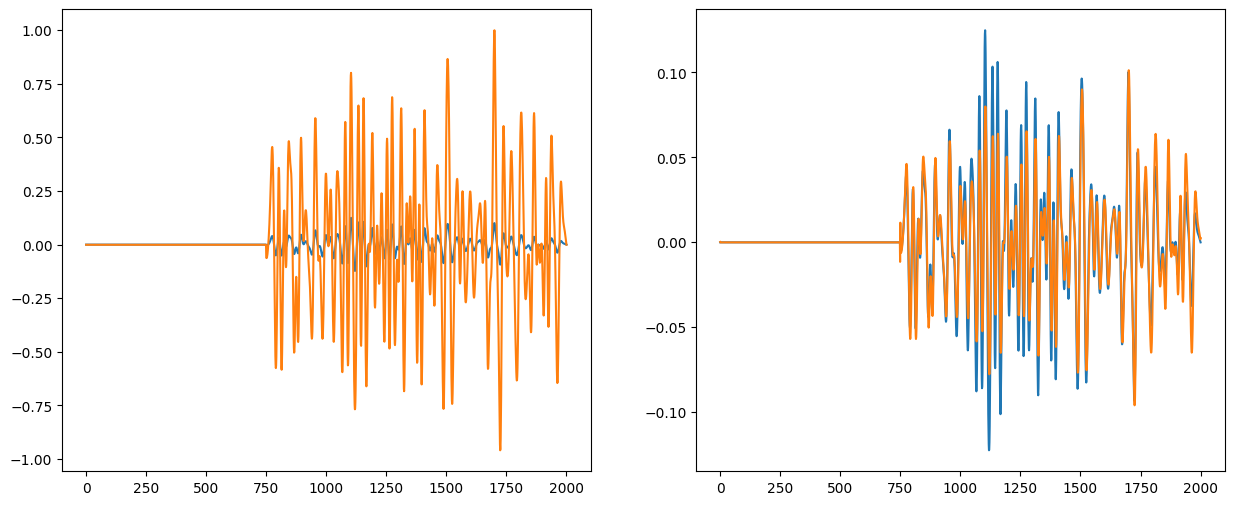

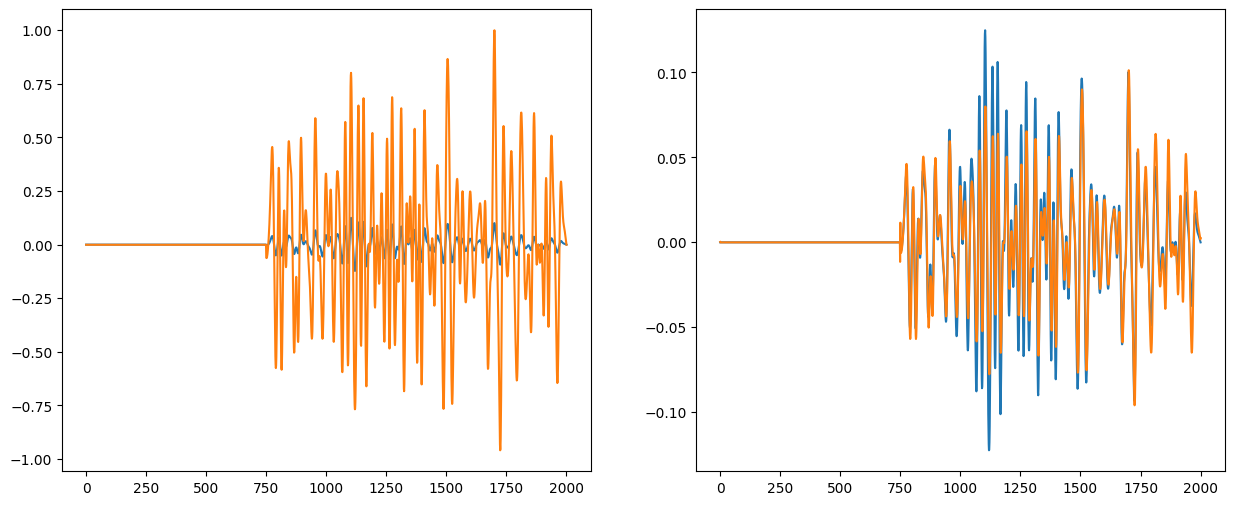

In [103]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(model[number_trace])
plt.plot(model_agc[number_trace])

plt.subplot(1, 2, 2)
plt.plot(model[number_trace])
plt.plot(approx_real_signal_1d_rls[number_trace])


plt.show()

# Общие выводы

In [104]:
print("My LMS")
# print(f"MSE = {ps.MSE(approx_real_signal_1d_nlms, model):.3e}")
print(f"MAE = {ps.ME(approx_real_signal_1d_lms, model):.3e}")
print("My NLMS")
# print(f"MSE = {ps.MSE(approx_real_signal_1d_nlms, model):.3e}")
print(f"MAE = {ps.ME(approx_real_signal_1d_nlms, model):.3e}")
print("My RLS")
# print(f"MSE = {ps.MSE(approx_real_signal_1d_rls, model):.3e}")
print(f"MAE = {ps.ME(approx_real_signal_1d_rls, model):.3e}")
print("All error")
# print(f"MSE = {ps.MSE(np.zeros((96, 2001)), model):.3e}")
# print(f"ME = {ps.ME(np.zeros((96, 2001)), model):.3e}")
print(f"MSE = {ps.MSE(model_agc, model):.3e}")
print(f"MAE = {ps.ME(model_agc, model):.3e}")

My LMS
MAE = 1.414e-02
My NLMS
MAE = 1.391e-02
My RLS
MAE = 8.775e-03
All error
MSE = 5.222e-02
MAE = 1.451e-01
My LMS
MAE = 1.414e-02
My NLMS
MAE = 1.391e-02
My RLS
MAE = 8.775e-03
All error
MSE = 5.222e-02
MAE = 1.451e-01
